In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO
import cv2 as cv
import random

## Training of the nano Yolo model for object detection

In [ ]:
!yolo task=detect mode=train model="yolov8n.yaml" data="/home/user/Стільниця/python/jpnb_projects/Military_Aircraft_Recognition/data/data_yolo/config.yaml" epochs=20


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

       1/20         0G      3.076      4.501      3.454        104        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1153       6916      0.202      0.137     0.0492     0.0174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/20         0G      2.082      3.074      2.114         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1153       6916      0.214      0.318      0.123     0.0692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/20         0G      1.697      2.604      1.732        108        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1153       6916      0.319      0.441      0.221      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/2

In [1]:
!yolo task=detect mode=train model="runs/detect/train/weights/best.pt" data="/home/user/Стільниця/python/jpnb_projects/Military_Aircraft_Recognition/data/data_yolo/config.yaml" epochs=10

New https://pypi.org/project/ultralytics/8.0.197 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.180 🚀 Python-3.9.16 torch-2.0.1+cu117 CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine/trainer: task=detect, mode=train, model=runs/detect/train/weights/best.pt, data=/home/user/Стільниця/python/jpnb_projects/Military_Aircraft_Recognition/data/data_yolo/config.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_l

## Results

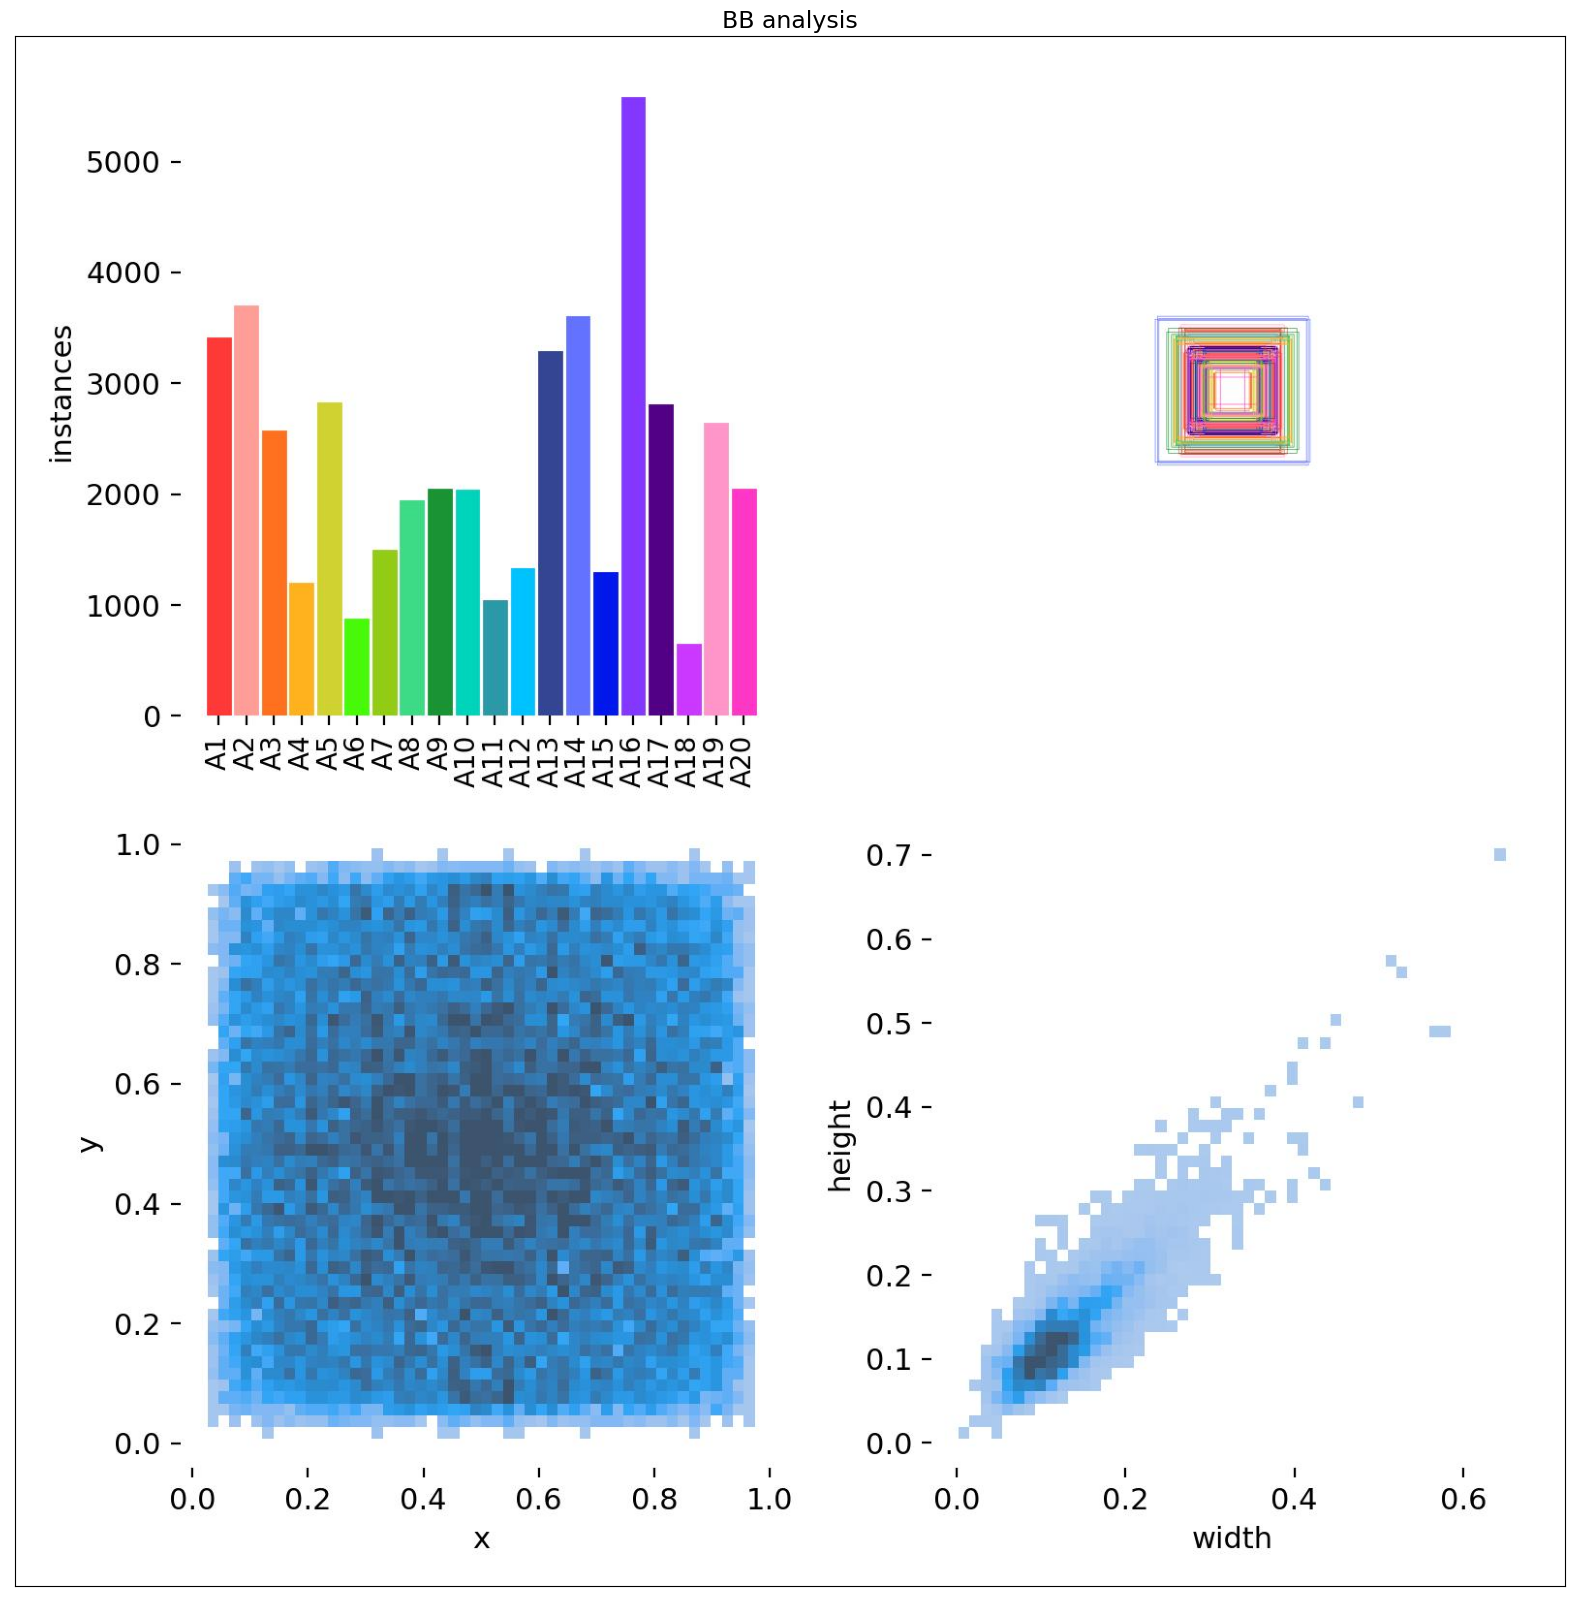

In [16]:
plt.figure(figsize=(20, 30))

plot = cv.cvtColor(cv.imread("runs/detect/train2/labels.jpg"), cv.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.title("BB analysis", fontsize=17)
plt.imshow(plot)
plt.show()

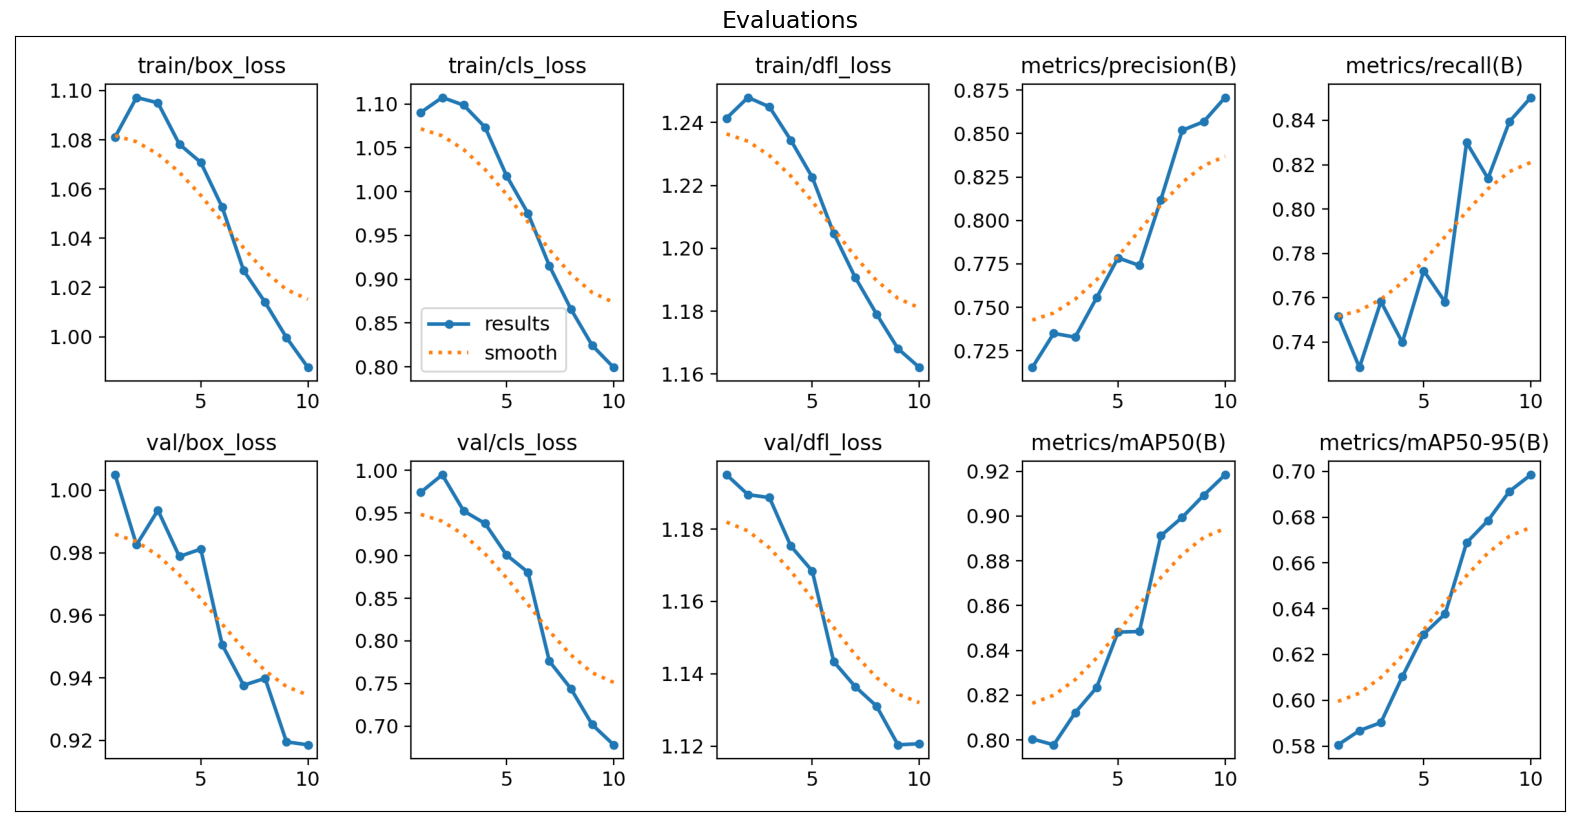

In [14]:
plt.figure(figsize=(20, 30))

plot = cv.cvtColor(cv.imread("runs/detect/train2/results.png"), cv.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.title("Evaluations", fontsize=17)
plt.imshow(plot)
plt.show()

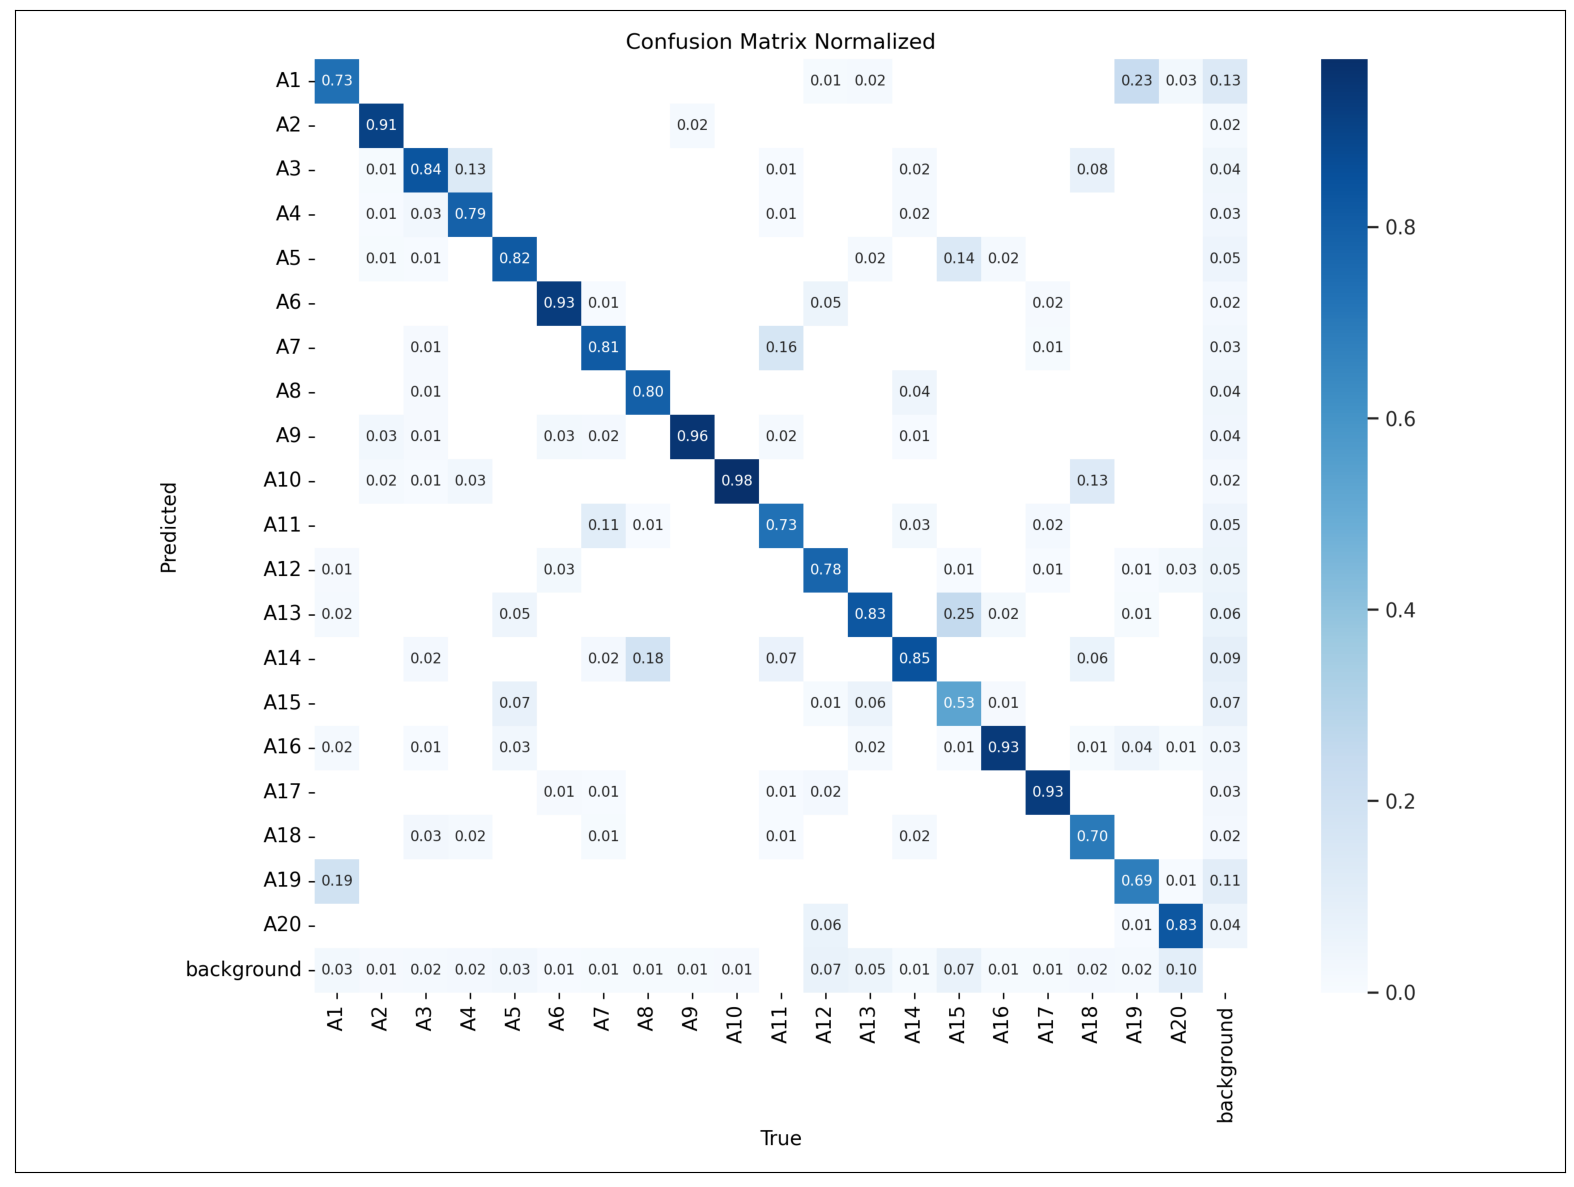

In [19]:
plt.figure(figsize=(20, 30))

plot = cv.cvtColor(cv.imread("runs/detect/train2/confusion_matrix_normalized.png"), cv.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(plot)
plt.show()

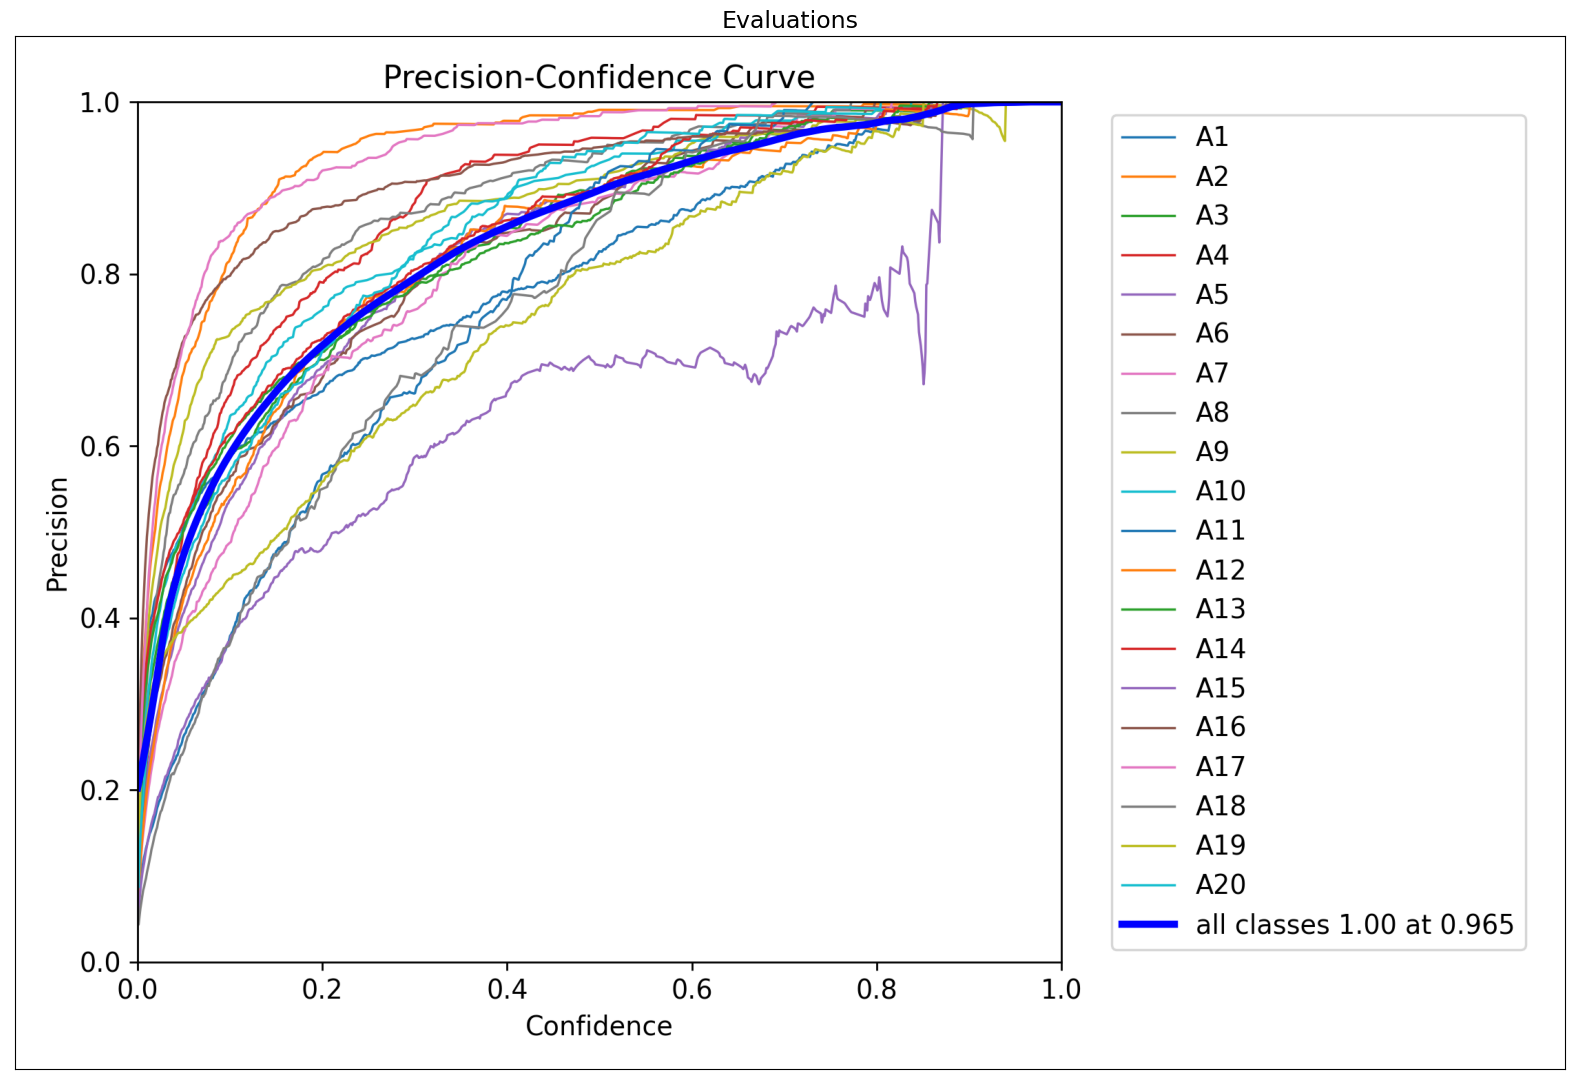

In [20]:
plt.figure(figsize=(20, 30))

plot = cv.cvtColor(cv.imread("runs/detect/train2/P_curve.png"), cv.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(plot)
plt.show()

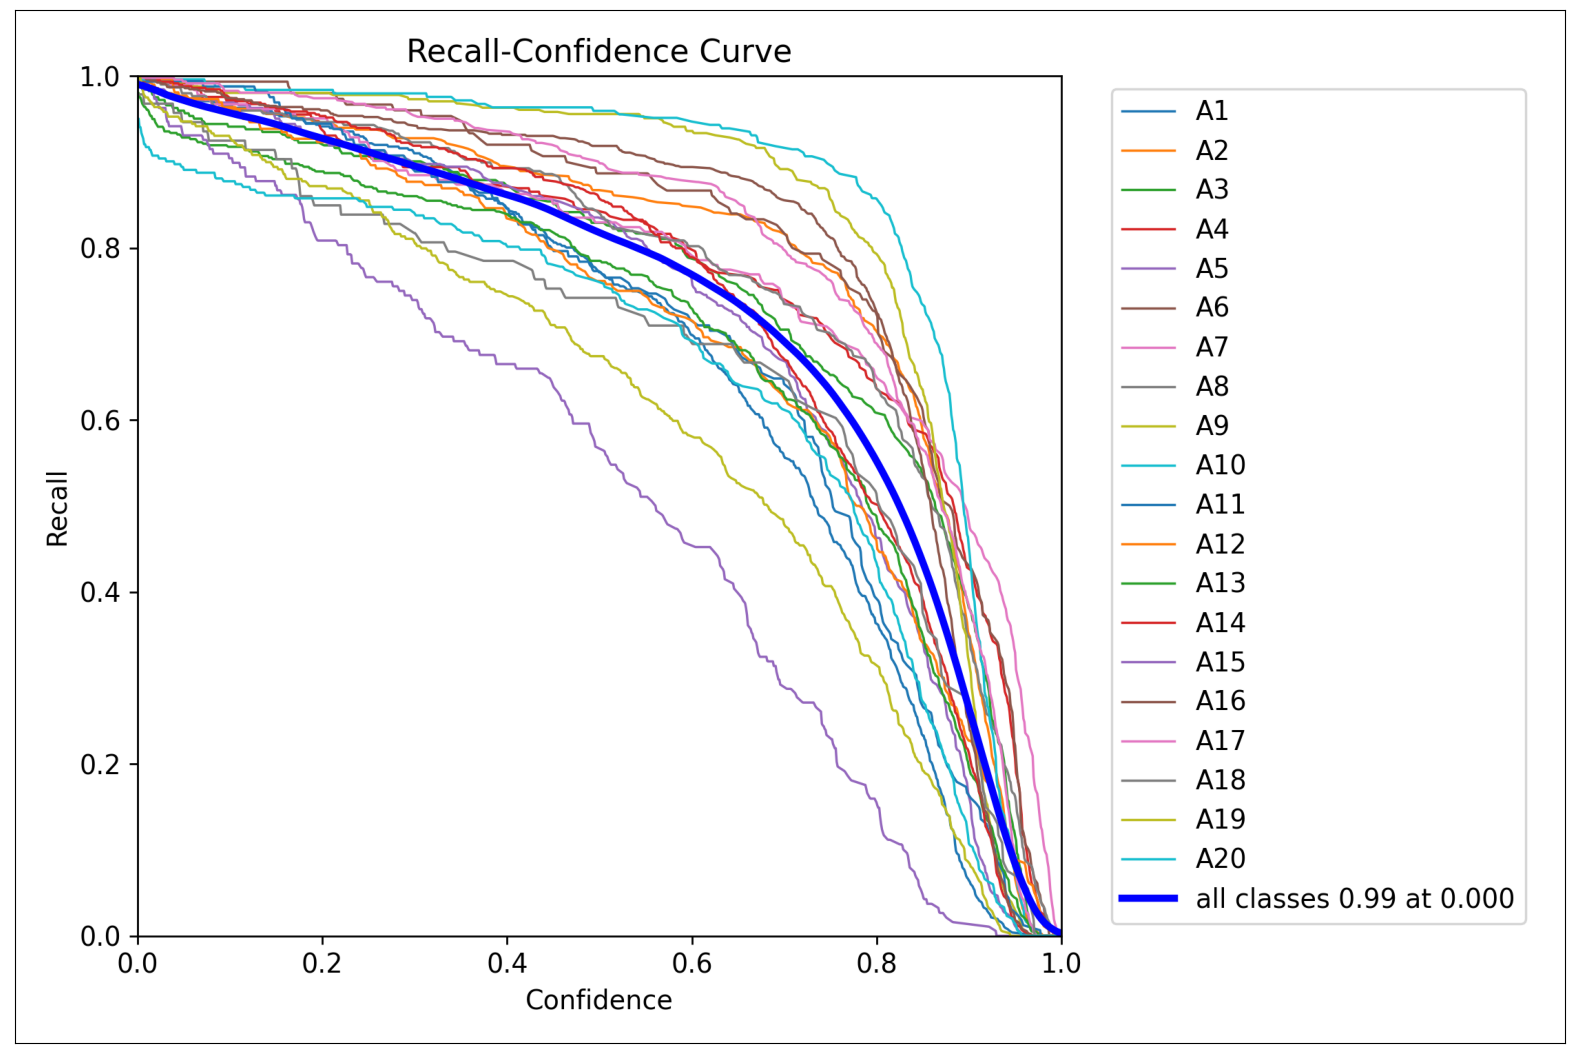

In [21]:
plt.figure(figsize=(20, 30))

plot = cv.cvtColor(cv.imread("runs/detect/train2/R_curve.png"), cv.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(plot)
plt.show()

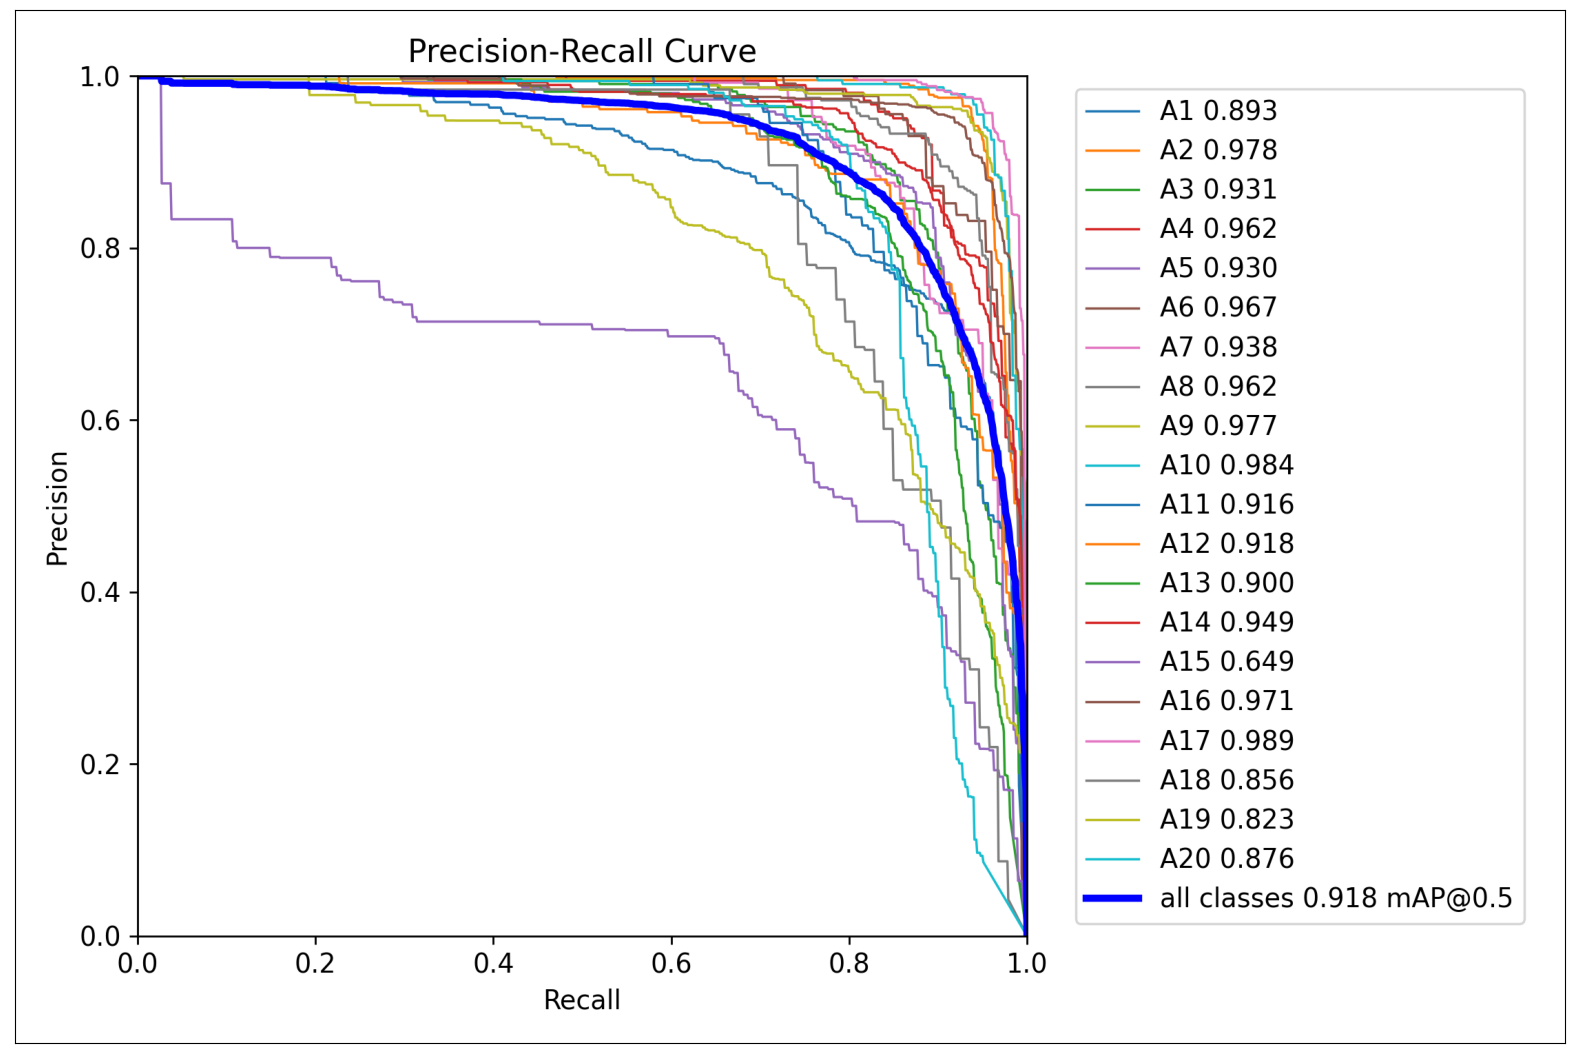

In [22]:
plt.figure(figsize=(20, 30))

plot = cv.cvtColor(cv.imread("runs/detect/train2/PR_curve.png"), cv.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(plot)
plt.show()

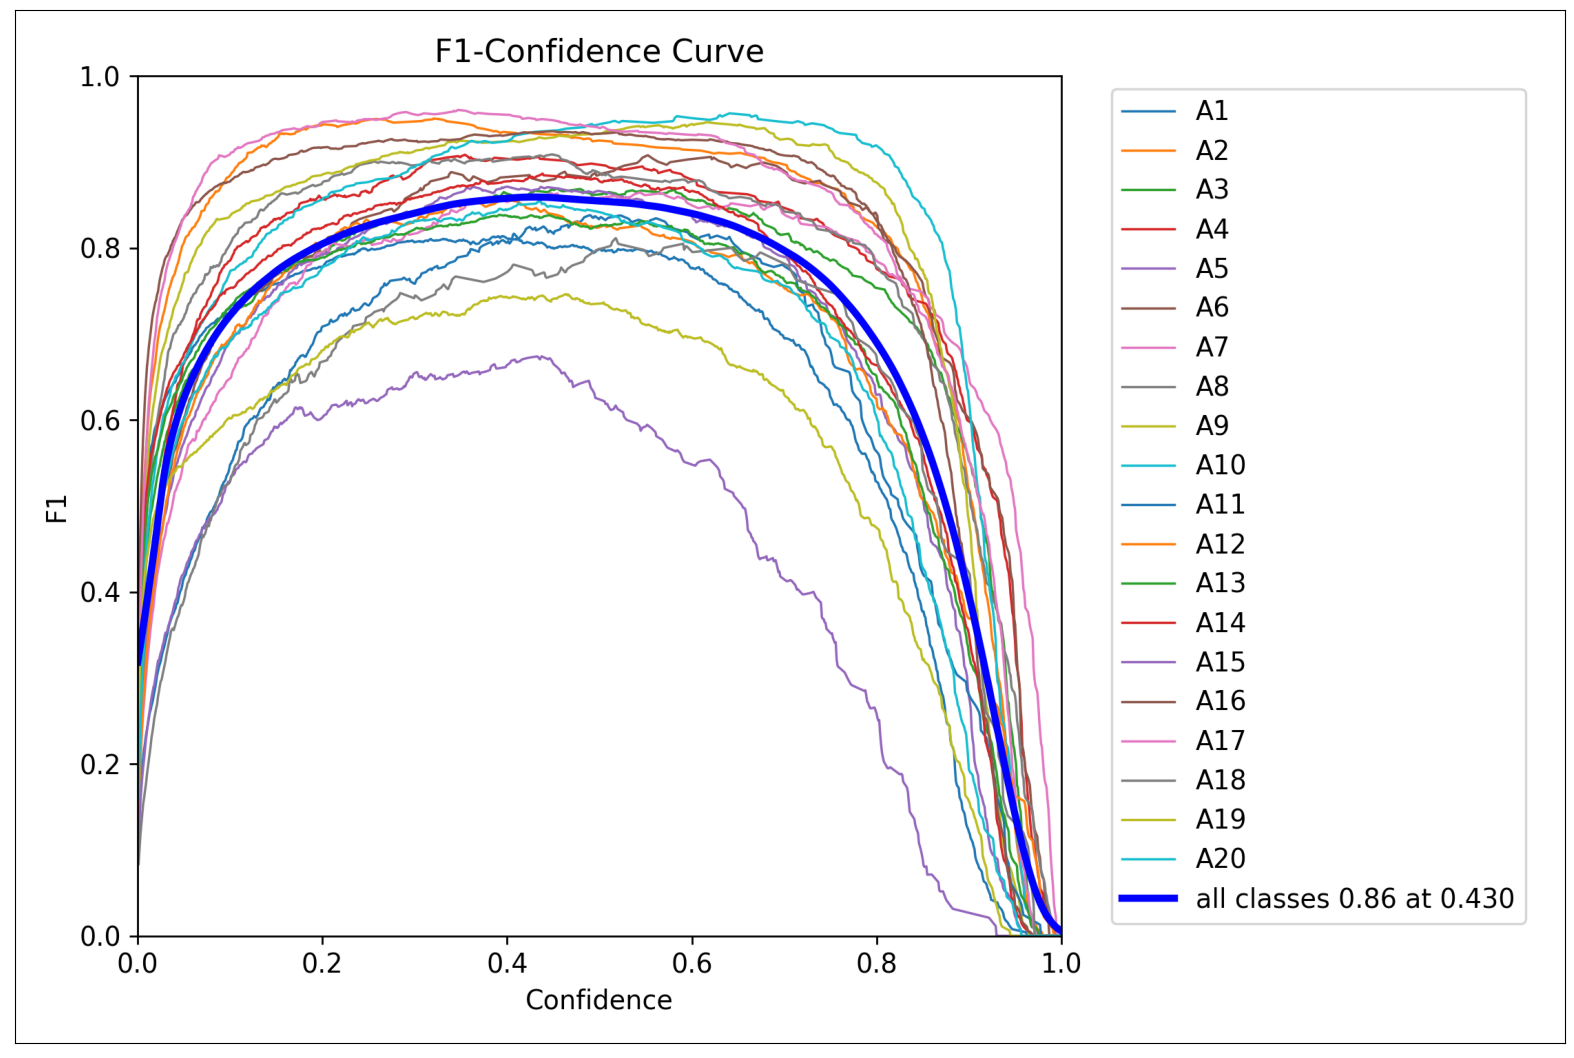

In [23]:
plt.figure(figsize=(20, 30))

plot = cv.cvtColor(cv.imread("runs/detect/train2/F1_curve.png"), cv.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(plot)
plt.show()

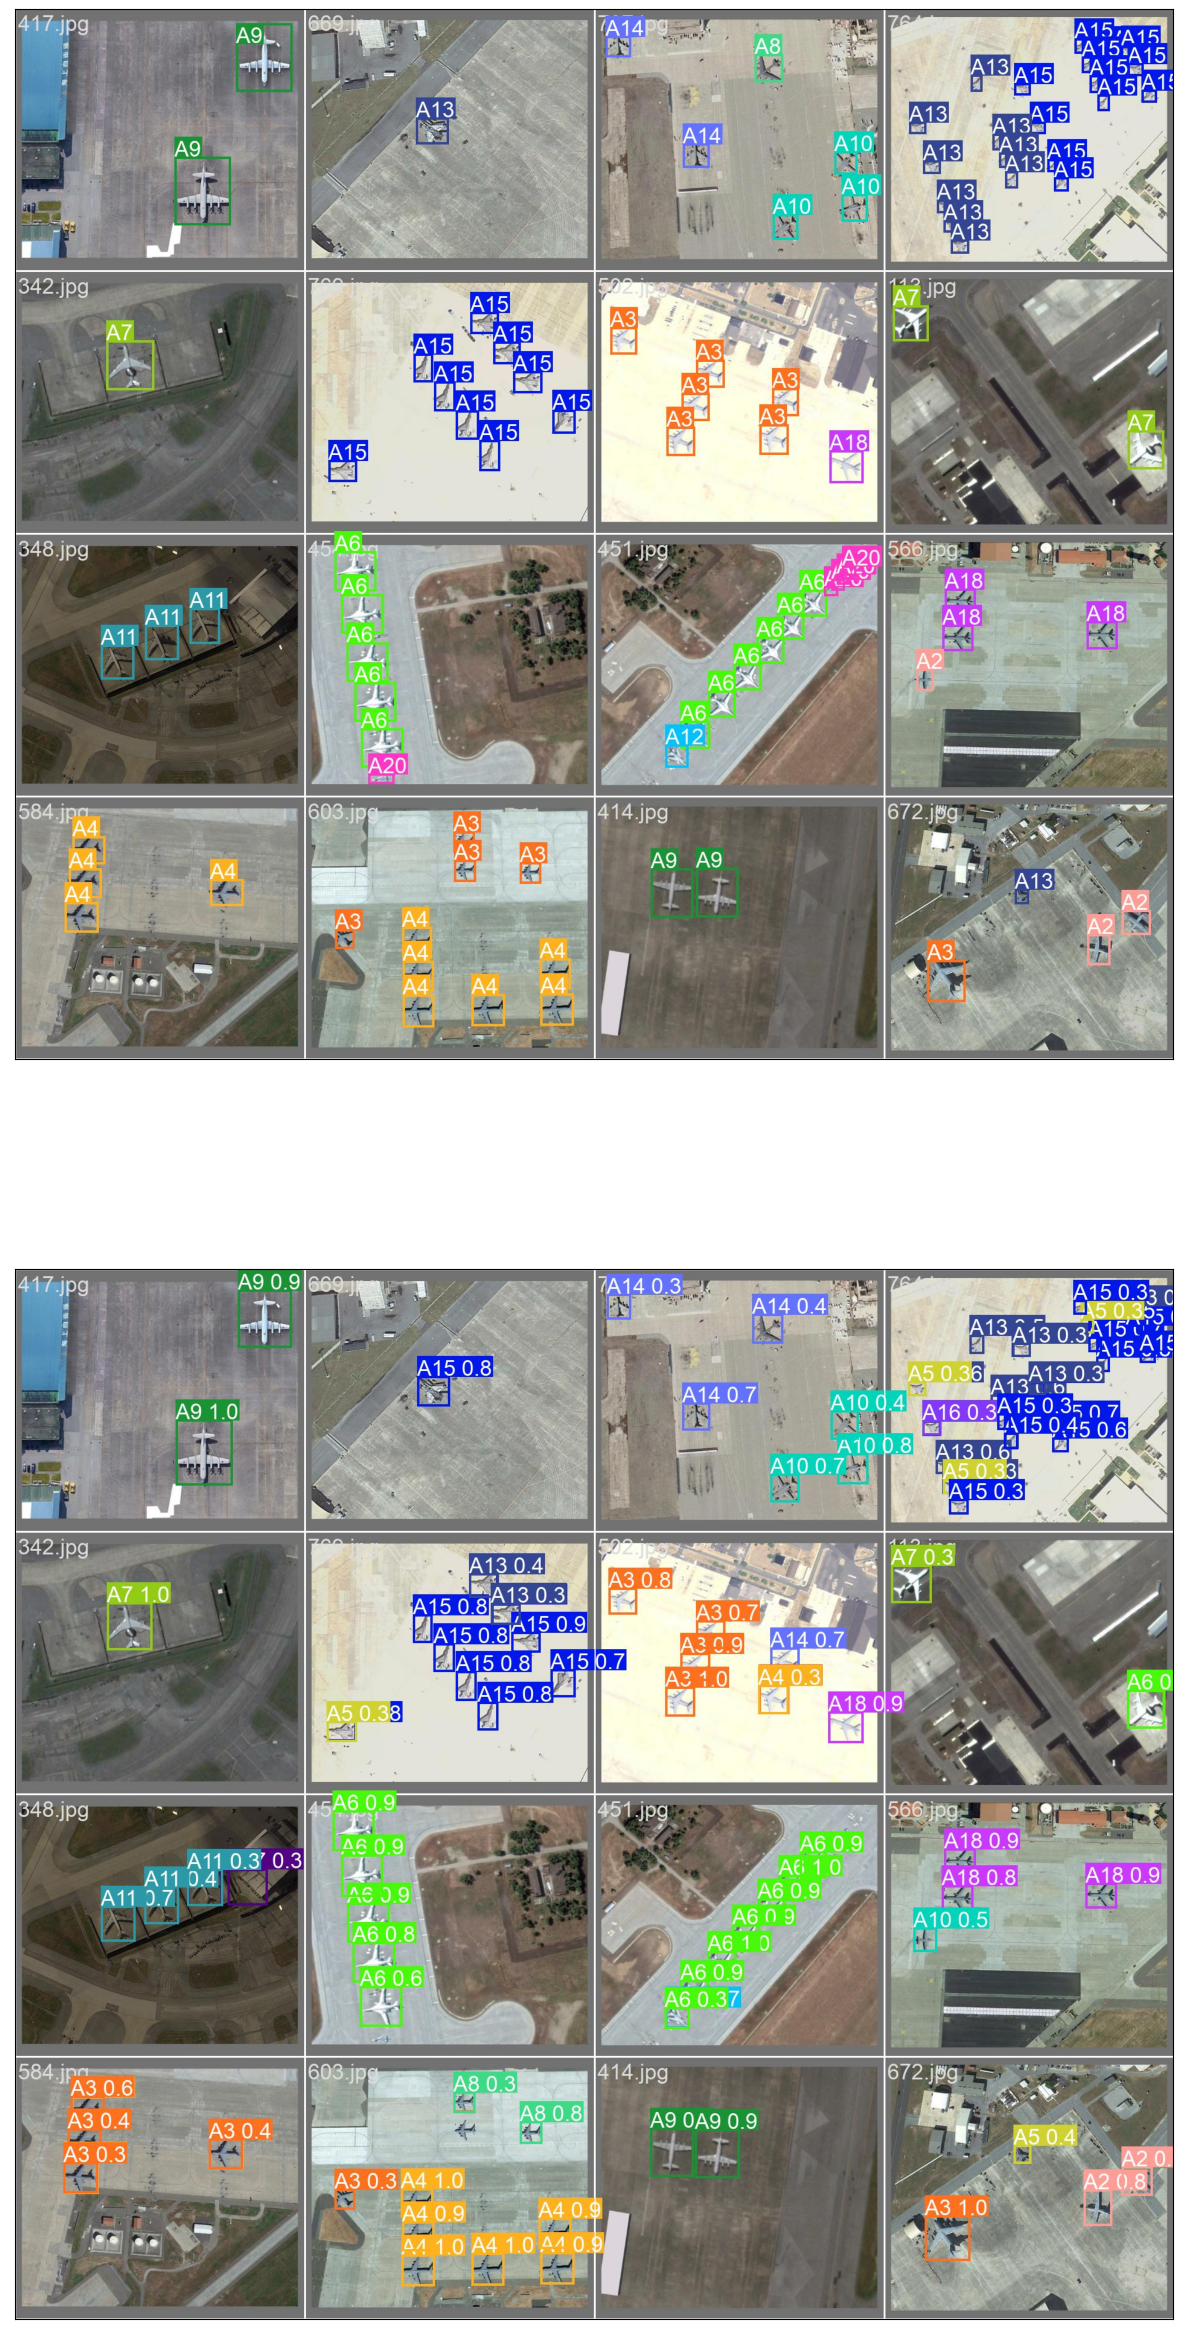

In [27]:
fig, axis = plt.subplots(2, 1, figsize=(20, 30))

val_labels = cv.cvtColor(cv.imread("runs/detect/train2/val_batch1_labels.jpg"), cv.COLOR_BGR2RGB)
val_pred = cv.cvtColor(cv.imread("runs/detect/train2/val_batch1_pred.jpg"), cv.COLOR_BGR2RGB)


axis[0].set_xticks([])
axis[0].set_yticks([])
axis[0].imshow(val_labels)


axis[1].set_xticks([])
axis[1].set_yticks([])
axis[1].imshow(val_pred)

plt.show()

*We can easily see that our model makes a lot of mistakes on some types of aircrafts, such as A15, A19, A8. Lets compare them to other types our model mispredict it.*

## Types of Aircrafts model confuses the most

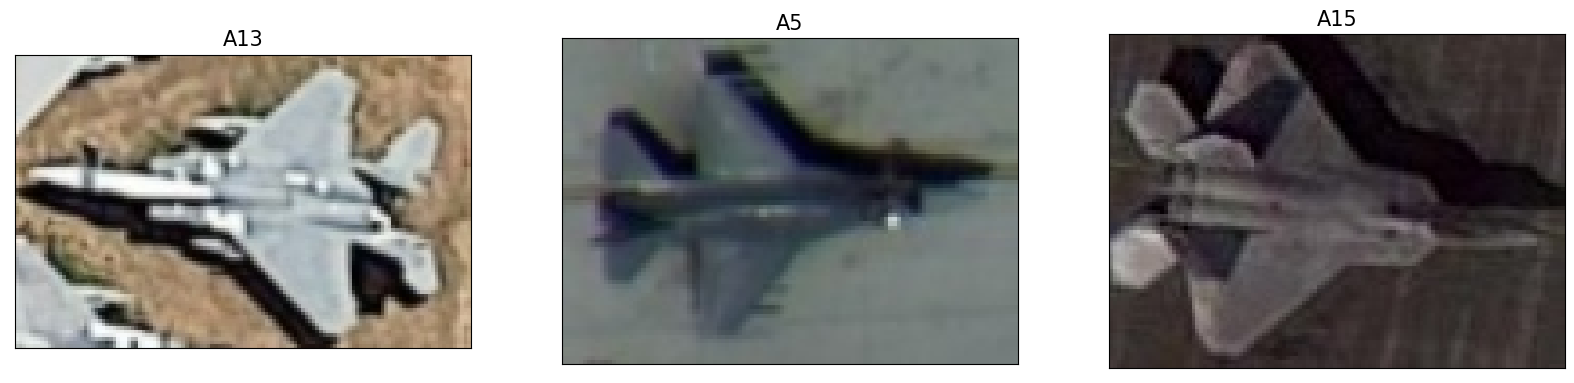

In [38]:
fig, axis = plt.subplots(1, 3, figsize=(20, 30))


image1 = cv.cvtColor(cv.imread(os.path.join("data/data_clf/A13/", random.choice(os.listdir("data/data_clf/A13/")))), cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(cv.imread(os.path.join("data/data_clf/A5/", random.choice(os.listdir("data/data_clf/A5/")))), cv.COLOR_BGR2RGB)
image3 = cv.cvtColor(cv.imread(os.path.join("data/data_clf/A15/", random.choice(os.listdir("data/data_clf/A15/")))), cv.COLOR_BGR2RGB)


axis[0].set_xticks([])
axis[0].set_yticks([])
axis[0].set_title("A13", fontsize=15)
axis[0].imshow(image1)


axis[1].set_xticks([])
axis[1].set_yticks([])
axis[1].set_title("A5", fontsize=15)
axis[1].imshow(image2)


axis[2].set_xticks([])
axis[2].set_yticks([])
axis[2].set_title("A15", fontsize=15)
axis[2].imshow(image3)

plt.show()

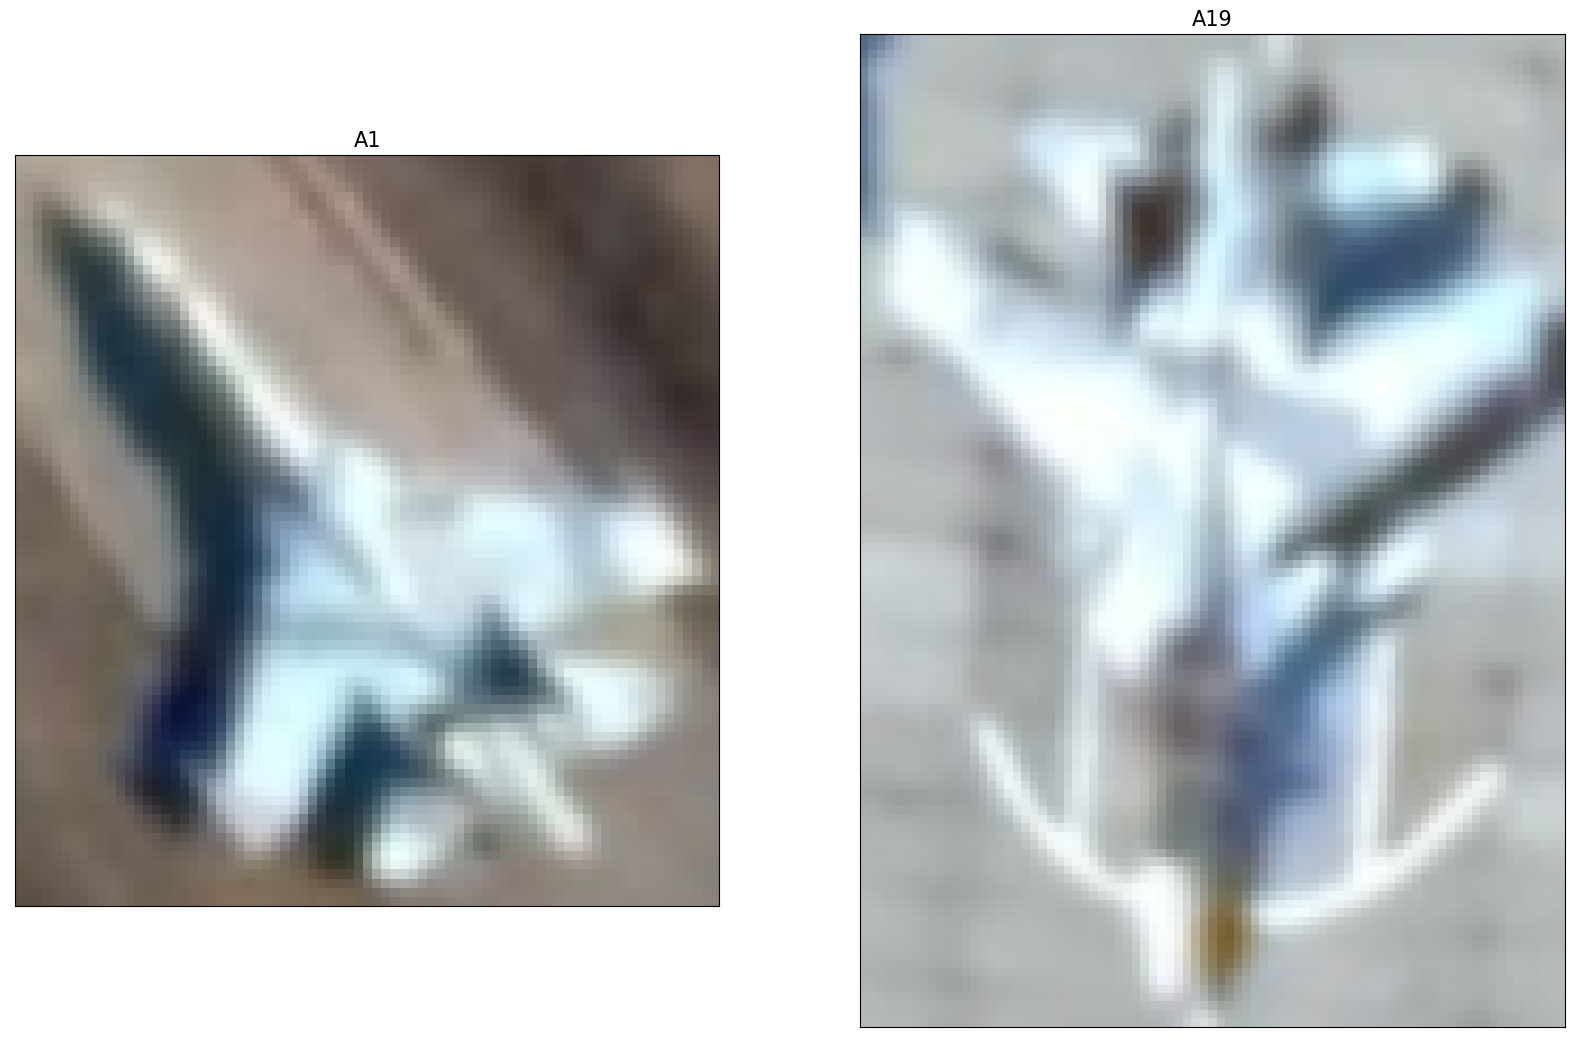

In [45]:
fig, axis = plt.subplots(1, 2, figsize=(20, 30))


image1 = cv.cvtColor(cv.imread(os.path.join("data/data_clf/A1/", random.choice(os.listdir("data/data_clf/A1/")))), cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(cv.imread(os.path.join("data/data_clf/A19/", random.choice(os.listdir("data/data_clf/A19/")))), cv.COLOR_BGR2RGB)


axis[0].set_xticks([])
axis[0].set_yticks([])
axis[0].set_title("A1", fontsize=15)
axis[0].imshow(image1)


axis[1].set_xticks([])
axis[1].set_yticks([])
axis[1].set_title("A19", fontsize=15)
axis[1].imshow(image2)


plt.show()

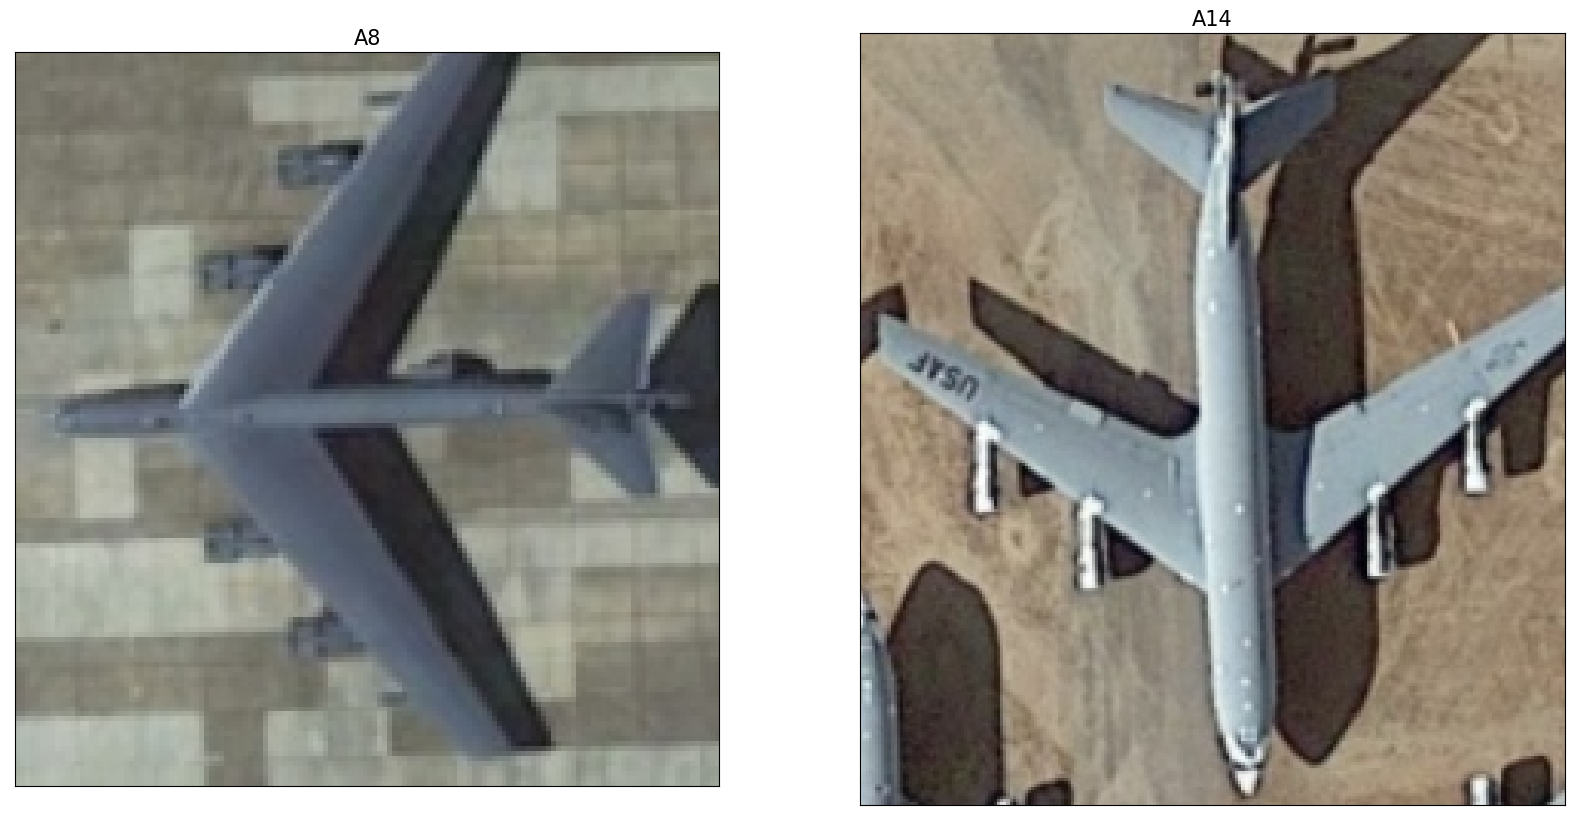

In [50]:
fig, axis = plt.subplots(1, 2, figsize=(20, 30))


image1 = cv.cvtColor(cv.imread(os.path.join("data/data_clf/A8/", random.choice(os.listdir("data/data_clf/A8/")))), cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(cv.imread(os.path.join("data/data_clf/A14/", random.choice(os.listdir("data/data_clf/A14/")))), cv.COLOR_BGR2RGB)


axis[0].set_xticks([])
axis[0].set_yticks([])
axis[0].set_title("A8", fontsize=15)
axis[0].imshow(image1)


axis[1].set_xticks([])
axis[1].set_yticks([])
axis[1].set_title("A14", fontsize=15)
axis[1].imshow(image2)


plt.show()

In [56]:
res = pd.read_csv("runs/detect/train2/results.csv")
res

epoch           train/box_loss           train/cls_loss  \
0                        1                  1.08110                  1.09040   
1                        2                  1.09720                  1.10750   
2                        3                  1.09500                  1.09870   
3                        4                  1.07820                  1.07340   
4                        5                  1.07080                  1.01820   
5                        6                  1.05260                  0.97522   
6                        7                  1.02690                  0.91533   
7                        8                  1.01400                  0.86605   
8                        9                  0.99964                  0.82438   
9                       10                  0.98750                  0.79920   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.2414                  0.71533                  0.75164   
1                   1.2480                  0.73497                  0.72848   
2                   1.2450                  0.73279                  0.75824   
3                   1.2344                  0.75545                  0.73978   
4                   1.2226                  0.77846                  0.77215   
5                   1.2048                  0.77407                  0.75795   
6                   1.1908                  0.81193                  0.82996   
7                   1.1791                  0.85189                  0.81379   
8                   1.1681                  0.85684                  0.83947   
9                   1.1621                  0.87081                  0.85034   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.80046                  0.58052                  1.00490   
1                  0.79783                  0.58675                  0.98249   
2                  0.81217                  0.59023                  0.99358   
3                  0.82339                  0.61028                  0.97878   
4                  0.84820                  0.62887                  0.98116   
5                  0.84843                  0.63777                  0.95057   
6                  0.89121                  0.66881                  0.93763   
7                  0.89947                  0.67853                  0.93986   
8                  0.90930                  0.69126                  0.91955   
9                  0.91846                  0.69850                  0.91860   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                  0.97439                   1.1950                 0.000139   
1                  0.99488                   1.1895                 0.000250   
2                  0.95243                   1.1887                 0.000334   
3                  0.93768                   1.1753                 0.000293   
4                  0.90082                   1.1684                 0.000293   
5                  0.88052                   1.1434                 0.000252   
6                  0.77617                   1.1365                 0.000211   
7                  0.74416                   1.1311                 0.000169   
8                  0.70176                   1.1204                 0.000128   
9                  0.67808                   1.1207                 0.000087   

                    lr/pg1                   lr/pg2  
0                 0.000139                 0.000139  
1                 0.000250                 0.000250  
2                 0.000334                 0.000334  
3                 0.000293                 0.000293  
4                 0.000293                 0.000293  
5                 0.000252                 0.000252  
6                 0.000211                 0.000211  
7                 0.000169                 0.000169  
8          

In [58]:
precision = res.loc[9, "   metrics/precision(B)"]
recall = res.loc[9, "      metrics/recall(B)"]
f1 = 2 * precision * recall / (precision + recall)

In [59]:
print(f"The model:\n\nprecision: {precision}\nrecall: {recall}\nF1: {round(f1, 4)}")

The model:

precision: 0.87081
recall: 0.85034
F1: 0.8605


## Training of the small Yolo model for object detection